In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets

In [8]:
path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/test_softmax_csv"
model_names = ['cnn', 'mlp', 'gru', 'lstm', 'transformer', 'gtn', 'tft']
data_dict = {}

for model in model_names:
    file = f"test_softmax_outputs_{model}.csv"
    data_dict[model] = pd.read_csv(f"{path}/{file}")
print(data_dict.keys())

dict_keys(['cnn', 'mlp', 'gru', 'lstm', 'transformer', 'gtn', 'tft'])


In [9]:
#only change the model name here
model = "transformer"

In [19]:
path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/test_softmax_csv"
file = f"test_softmax_outputs_{model}.csv"

In [20]:
df = pd.read_csv(f"{path}/{file}")

In [22]:
false_positive_sample_ids = [
    16233, 15538, 15330, 15494, 16849, 15341, 17076, 16985, 16861, 15569,
    16701, 16838, 16896, 15759, 15687, 15391, 15593, 16919, 17079, 15647,
    14748, 15306, 14825, 17031, 16696, 16781, 16917, 16829, 16787, 15639,
    15767, 17000, 15624, 17028, 15499, 15559, 15621, 16823, 15812, 15459,
    15390, 15406, 17050, 16735, 15659, 15334, 15600, 15603, 16736, 15557,
    15452, 16789, 15356, 16996, 15382, 17226, 15397, 17038, 15758, 16688,
    17179, 17024, 15577, 17040, 17191, 15318, 15420, 15656, 15376, 15617,
    16949, 17139, 17001, 16886, 16687, 15503, 15466, 16713, 17007, 15398,
    16577, 15508, 15380, 15229, 16802, 15530, 16856, 15502, 15319, 16983,
    16940, 16938, 16810, 15324, 17059, 17215, 16754, 15400, 16897, 15572
]

false_positive_df = df[df['sample_id'].isin(false_positive_sample_ids)]
false_positive_df

,prob,lat,lon,sample_id,label,log_burned_area
62,0.939368,8.985880,41.869305,16849,0,3.401197
248,0.982514,1.363669,36.270957,16713,0,3.401197
256,0.992956,3.629187,36.633440,16886,0,3.401197
398,0.862179,8.844915,42.483513,15508,0,3.401197
466,0.868662,35.900242,35.616474,16983,0,3.401197
...,...,...,...,...,...,...
3989,0.809205,22.599130,41.013443,16940,0,3.401197
4005,0.886773,-6.147784,33.542266,15687,0,3.401197
4068,0.938974,13.315538,43.369582,17007,0,3.401197
4076,0.882226,19.930853,40.036752,15759,0,3.401197


In [23]:
false_negative_sample_ids = [
    8449, 3713, 625, 4152, 4892, 6519, 8453, 8523, 6692, 6079, 3126, 671, 8448, 3131, 2952, 4801,
    4835, 4894, 4433, 4428, 5977, 6040, 3908, 702, 4800, 4832, 3920, 670, 3901, 4798, 3933, 6682,
    719, 8374, 1608, 661, 3080, 630, 3651, 3932, 6201, 3730, 3904, 2970, 701, 622, 1619, 1656, 6699,
    4422, 4836, 1639, 643, 3650, 4888, 6582, 8475, 5971, 2957, 8344, 6200, 6694, 1645, 665, 4893,
    3711, 6701, 5978, 2959, 4839, 6210, 5962, 632, 6121, 6067, 707, 3708, 3190, 3738, 6090, 4459,
    658, 3911, 1634, 5956, 3224, 2976, 3917, 623, 6522, 1642, 4927, 3912, 4806, 2962, 640, 1610,
    631, 8561, 8562
]
false_negative_df = df[df['sample_id'].isin(false_negative_sample_ids)]
false_negative_df

,prob,lat,lon,sample_id,label,log_burned_area
1,0.039254,14.080780,42.201581,3708,1,4.682131
8,0.013475,35.819690,34.075921,6701,1,3.891820
51,0.023716,16.457057,39.925994,3080,1,4.795791
115,0.044427,29.355410,36.301164,4798,1,5.726848
116,0.036183,-6.389439,38.959372,632,1,5.680172
...,...,...,...,...,...,...
3939,0.002497,8.089742,43.963651,3650,1,4.110874
3981,0.058325,22.568923,41.547098,4832,1,3.828641
3993,0.078585,29.194307,39.422545,6210,1,5.552959
4024,0.309016,21.008233,41.023512,6522,1,3.496508


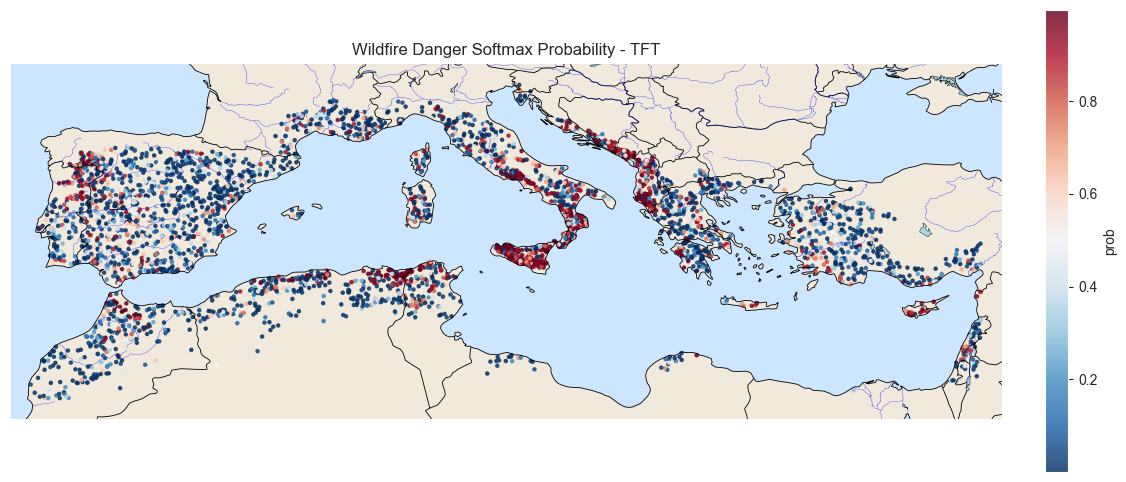

In [14]:
x = df['lat']
y = df['lon']
influence_variable = df['prob'] #softmax probability of each validation sample

# Plot mit Cartopy
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([x.min() - 1, x.max() + 1, y.min() - 1, y.max() + 1], crs=ccrs.PlateCarree())
#ax.stock_img()

# Features hinzufügen
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

# Scatter mit Farbe nach Population
sc = ax.scatter(x, y, c=influence_variable, cmap='RdBu_r', s=5, alpha=0.8, vmin=influence_variable.min(), vmax=influence_variable.max(), transform=ccrs.PlateCarree())

# Farbskala
cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cb.set_label(f'{influence_variable.name}')

# Titel
plt.title("Wildfire Danger Softmax Probability - TFT")

plt.show()

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets
import os

# Pfad zur CSV-Datei
path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/test_softmax_csv"

# Liste der Modellnamen
model_names = ['cnn', 'mlp', 'gru', 'lstm', 'transformer', 'gtn', 'tft']

# Dropdown-Widget für Modell- und Label-Auswahl
model_selector = widgets.Dropdown(
    options=model_names,
    value="transformer",
    description="Model:"
)

label_selector = widgets.Dropdown(
    options=["all", "positive", "negative"],
    value="all",
    description="Label:"
)

# Plotfunktion
def plot_softmax_map(model, label_filter):
    file = f"test_softmax_outputs_{model}.csv"
    filepath = os.path.join(path, file)

    if not os.path.exists(filepath):
        print(f"File not found for model: {model}")
        return

    df = pd.read_csv(filepath)
    df.rename(columns={"x": "lon", "y": "lat"}, inplace=True)

    if label_filter == "positive":
        data = df[df["label"] == 1]
    elif label_filter == "negative":
        data = df[df["label"] == 0]
    else:
        data = df

    fig = plt.figure(figsize=(14, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([data["lat"].min() - 1, data["lat"].max() + 1,
                   data["lon"].min() - 1, data["lon"].max() + 1],
                  crs=ccrs.PlateCarree())

    # Basemap
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#FBF7EB') #FBFFCA hellgalb, #f0e9dc beige, #FBF7EB light beige
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.4)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='#3B65DB', linewidth=0.5)

    sc = ax.scatter(
        data["lat"], data["lon"],
        c=data["prob"],
        cmap='coolwarm', #Spectral_r, turbo, RdBu_r
        s=5, alpha=0.8,
        vmin=df["prob"].min(), vmax=df["prob"].max(),
        transform=ccrs.PlateCarree()
    )

    cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cb.set_label("Softmax Probability")

    plt.title(None)
    plt.title(f"Wildfire Danger Softmax Probability - {model.upper()} ({label_filter})")
    plt.show()

# Interaktive Widgets kombinieren
widgets.interact(plot_softmax_map, model=model_selector, label_filter=label_selector);


interactive(children=(Dropdown(description='Model:', index=4, options=('cnn', 'mlp', 'gru', 'lstm', 'transform…

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

# Pfade
input_path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/test_softmax_csv"
output_path = "/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Softmax_plots"
os.makedirs(output_path, exist_ok=True)

# Modelle und Labeloptionen
model_names = ['cnn', 'mlp', 'gru', 'lstm', 'transformer', 'gtn', 'tft']
label_options = ["all", "positive", "negative"]

def plot_and_save_softmax_map(model, label_filter):
    file = f"test_softmax_outputs_{model}.csv"
    filepath = os.path.join(input_path, file)

    if not os.path.exists(filepath):
        print(f"File not found for model: {model}")
        return

    df = pd.read_csv(filepath)
    df.rename(columns={"x": "lon", "y": "lat"}, inplace=True)

    if label_filter == "positive":
        data = df[df["label"] == 1]
    elif label_filter == "negative":
        data = df[df["label"] == 0]
    else:
        data = df

    fig = plt.figure(figsize=(14, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([data["lat"].min() - 1, data["lat"].max() + 1,
                   data["lon"].min() - 1, data["lon"].max() + 1],
                  crs=ccrs.PlateCarree())

    # Basemap
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')  # FBFFCA hellgalb, #f0e9dc beige
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.4)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='#3B65DB', linewidth=0.5)

    sc = ax.scatter(
        data["lat"], data["lon"],
        c=data["prob"],
        cmap='coolwarm',  # Spectral_r, turbo, RdBu_r
        s=5, alpha=0.8,
        vmin=df["prob"].min(), vmax=df["prob"].max(),
        transform=ccrs.PlateCarree()
    )

    cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cb.set_label("Softmax Probability")

    if model != "transformer":
        model = model.upper()
    else: 
        model = "Transformer"
    plt.title(None)
    #plt.title(f"Wildfire Danger Softmax Probability - {model} ({label_filter})")

    # Speichern
    filename = f"softmax_map_{model}_{label_filter}_beige_dark.png"
    save_path = os.path.join(output_path, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"[✓] Saved plot: {save_path}")

for model in model_names:
    for label in label_options:
        plot_and_save_softmax_map(model, label)

[✓] Saved plot: /Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Softmax_plots/softmax_map_CNN_all_beige_dark.png
[✓] Saved plot: /Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Softmax_plots/softmax_map_CNN_positive_beige_dark.png
[✓] Saved plot: /Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Softmax_plots/softmax_map_CNN_negative_beige_dark.png
[✓] Saved plot: /Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Softmax_plots/softmax_map_MLP_all_beige_dark.png
[✓] Saved plot: /Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Softmax_plots/softmax_map_MLP_positive_beige_dark.png
[✓] S

In [53]:
from scipy.interpolate import griddata

def plot_softmax_map(model, label_filter):
    file = f"test_softmax_outputs_{model}.csv"
    filepath = os.path.join(path, file)

    if not os.path.exists(filepath):
        print(f"File not found for model: {model}")
        return

    df = pd.read_csv(filepath)
    df.rename(columns={"x": "lon", "y": "lat"}, inplace=True)

    if label_filter == "positive":
        data = df[df["label"] == 1]
    elif label_filter == "negative":
        data = df[df["label"] == 0]
    else:
        data = df

    grid_lon = np.linspace(data["lon"].min(), data["lon"].max(), 500)  # X-Achse
    grid_lat = np.linspace(data["lat"].min(), data["lat"].max(), 500)  # Y-Achse
    #grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)

    lon_min, lon_max = -10, 40    # z. B. von Spanien bis Türkei
    lat_min, lat_max = 30, 50     # z. B. Nordafrika bis Mitteleuropa
    
    # Schritt 2: Regelmäßiges Raster in diesem Bereich erzeugen
    grid_lon = np.linspace(lon_min, lon_max, 500)
    grid_lat = np.linspace(lat_min, lat_max, 500)
    grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)

    # Interpolation
    grid_prob = griddata(
        (data["lon"], data["lat"]),
        data["prob"],
        (grid_lon, grid_lat),
        method='nearest'  # 'linear' oder 'cubic' können auch verwendet werden
    )

    masked_prob = np.ma.masked_invalid(grid_prob)

    fig = plt.figure(figsize=(14, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([data["lat"].min() - 1, data["lat"].max() + 1,
                   data["lon"].min() - 1, data["lon"].max() + 1],
                  crs=ccrs.PlateCarree())

    # Basemap
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

    # Rasterkarte mit korrekt orientierten Achsen
    im = ax.pcolormesh(
        grid_lon, grid_lat, masked_prob,
        cmap='RdBu_r',
        shading='auto',
        vmin=df["prob"].min(), vmax=df["prob"].max(),
        transform=ccrs.PlateCarree()
    )

    cb = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cb.set_label("Softmax Probability")

    plt.title(f"Wildfire Danger Map - {model.upper()} ({label_filter})")
    plt.show()


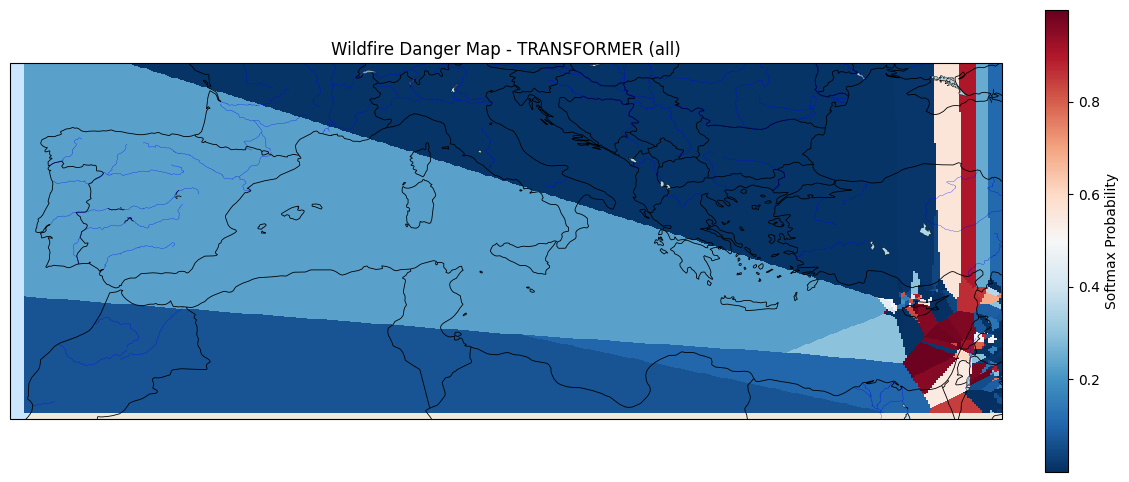

In [54]:
plot_softmax_map("transformer", "all")

In [10]:
sample_ids = [4792, 679, 8418, 1645, 1676]

for model in model_names:
    df = data_dict[model]
    selected_rows = df[df['sample_id'].isin(sample_ids)]
    print(f"\n{model.upper()} – Matching Samples:")
    print(selected_rows)



CNN – Matching Samples:
          prob        lat        lon  sample_id  label  log_burned_area
434   0.952787   4.172912  36.593164       8418      1        10.322230
529   0.270055  -6.218267  41.899512       1645      1        10.241601
650   0.992741  23.334165  38.818407       4792      1        10.844374
1910  0.413570  -6.037025  41.738409        679      1        10.389856
2312  0.812833  -7.497026  40.308615       1676      1        10.136977

MLP – Matching Samples:
          prob        lat        lon  sample_id  label  log_burned_area
800   0.992029  23.334165  38.818407       4792      1        10.844374
1362  0.772229  -7.497026  40.308615       1676      1        10.136977
1653  0.931372   4.172912  36.593164       8418      1        10.322230
1749  0.161926  -6.218267  41.899512       1645      1        10.241601
2781  0.319719  -6.037025  41.738409        679      1        10.389856

GRU – Matching Samples:
          prob        lat        lon  sample_id  label  log_b

In [10]:
data_dict['tft'][(data_dict['tft']['sample_id']==4792) | (data_dict['tft']['sample_id']==679) | (data_dict['tft']['sample_id']==8418) | (data_dict['tft']['sample_id']==1645) | (data_dict['tft']['sample_id']==1676)]

,prob,lat,lon,sample_id,label,log_burned_area
285,0.973704,4.172912,36.593164,8418,1,10.322230
940,0.182997,-6.218267,41.899512,1645,1,10.241601
1148,0.979553,23.334165,38.818407,4792,1,10.844374
2534,0.488200,-6.037025,41.738409,679,1,10.389856
2672,0.906081,-7.497026,40.308615,1676,1,10.136977
